 1 **What is Boosting in Machine Learning?**

Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like decision stumps) sequentially to create a strong predictive model. Each new model focuses on correcting the errors made by the previous models. The idea is to reduce bias and variance, thereby improving overall accuracy.

2. **How does Boosting differ from Bagging?**

Boosting builds models sequentially, each new model tries to fix the errors of the previous one. It focuses on misclassified or difficult examples by assigning them higher weights.

Bagging builds multiple models independently and in parallel by training each on a random bootstrap sample of the data, then aggregates their predictions (e.g., via majority voting).

Summary: Boosting reduces bias by sequential correction; Bagging reduces variance by parallel averaging.

3.**What is the key idea behind AdaBoost?**

AdaBoost (Adaptive Boosting) adjusts the weights of training samples such that misclassified points gain higher weights for the next learner to focus on them. Each weak learner is trained on a weighted dataset, and the final prediction is a weighted sum of weak learners’ outputs.

4.**Explain the working of AdaBoost with an example**

Initialize weights equally for all samples.

Train a weak learner (e.g., decision stump) on weighted data.

Calculate the weighted error rate.

Compute the learner’s weight in the final model (higher weight for lower error).

Update sample weights: increase weights for misclassified points, decrease for correctly classified.

Repeat steps 2-5 for a predefined number of rounds.

Final prediction is the weighted vote of all weak learners.

Example: If the first stump misclassifies certain points, their weights increase, so the next stump focuses on these points.

5. **What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting builds models sequentially by optimizing a loss function via gradient descent in function space. Each new learner fits the residual errors (gradients) of the combined ensemble so far.

AdaBoost adjusts weights explicitly on samples based on misclassification.

Gradient Boosting fits learners on the gradient of the loss function, allowing use of arbitrary differentiable loss functions (not just classification error).

6. **What is the loss function in Gradient Boosting?**

The loss function depends on the problem:

For regression: usually Mean Squared Error (MSE).

For classification: Log loss (deviance).

Gradient Boosting optimizes this loss function by fitting the new learner to the negative gradient of the loss with respect to the prediction.

7. **How does XGBoost improve over traditional Gradient Boosting?**

Implements regularization (L1 and L2) to reduce overfitting.

Supports parallel processing and hardware optimization.

Uses second-order derivatives (Hessian) for more accurate gradient approximation.

Handles missing values natively.

Includes tree pruning and optimized tree-building algorithms.

Efficient memory usage and scalability.

8. **What is the difference between XGBoost and CatBoost?**

XGBoost: Gradient boosting implementation focusing on speed and regularization; requires one-hot encoding of categorical features.

CatBoost: Designed specifically to handle categorical features efficiently using ordered target statistics and other techniques, avoiding overfitting. Also has symmetric trees and better performance on categorical data with less preprocessing.

9. **What are some real-world applications of Boosting techniques?**

Fraud detection in finance.

Customer churn prediction.

Click-through rate prediction in advertising.

Disease diagnosis from medical data.

Image classification and object detection.

Recommendation systems.

10. **How does regularization help in XGBoost?**

Regularization penalizes model complexity, preventing overfitting:

L1 regularization encourages sparsity (feature selection).

L2 regularization penalizes large leaf weights.

Helps to balance bias-variance tradeoff and improve model generalization.

11. **What are some hyperparameters to tune in Gradient Boosting models?**

Number of estimators (trees).

Learning rate (shrinkage).

Maximum tree depth.

Minimum samples per leaf/node.

Subsample ratio (stochastic gradient boosting).

Loss function.

Regularization parameters (alpha, lambda in XGBoost).

12. **What is the concept of Feature Importance in Boosting?**

Feature importance measures the contribution of each feature in improving the model’s predictive power, typically by:

How often the feature is used to split.

The average gain (reduction in loss) from splits on that feature.
This helps in understanding the model and feature selection.

13. **Why is CatBoost efficient for categorical data?**

CatBoost uses ordered target statistics and permutation-driven alternatives to encode categorical features internally, reducing overfitting and preserving feature relationships. This avoids the need for manual one-hot encoding and handles high-cardinality categorical features effectively.

In [35]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


AdaBoost Classifier Accuracy: 0.928
AdaBoost Regressor MAE: 57.161865380386544
Gradient Boosting Feature Importances: [8.89150214e-04 1.79085387e-02 4.93083605e-04 8.84982852e-05
 1.93410706e-04 2.82049964e-03 2.87739793e-05 4.74560845e-01
 4.10643086e-04 1.52187815e-04 7.09690716e-03 6.47707429e-03
 5.82945151e-04 8.86944608e-03 1.35904486e-03 1.93299695e-03
 1.28898526e-02 9.27634252e-03 1.49420695e-03 1.74321008e-03
 6.85475586e-02 5.15975109e-02 2.73858239e-02 4.41475366e-02
 4.09784590e-03 6.68395712e-04 1.65128368e-02 2.36669994e-01
 1.09221782e-03 1.26227352e-05]
Gradient Boosting Regressor R2: 0.8935907377332496
XGBoost Accuracy: 0.936
Gradient Boosting Accuracy: 0.928
CatBoost F1-Score: 0.9411764705882353
XGBoost Regressor MSE: 3732.2840221707825


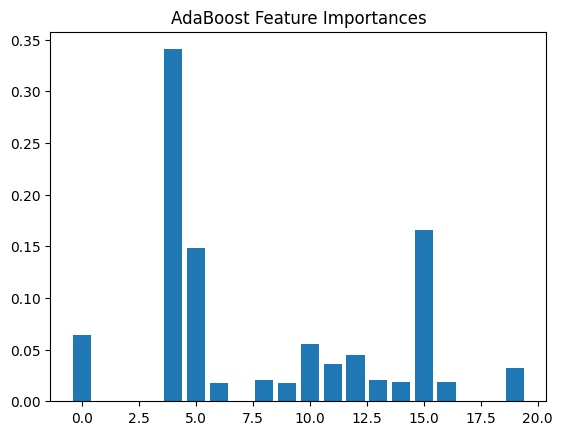

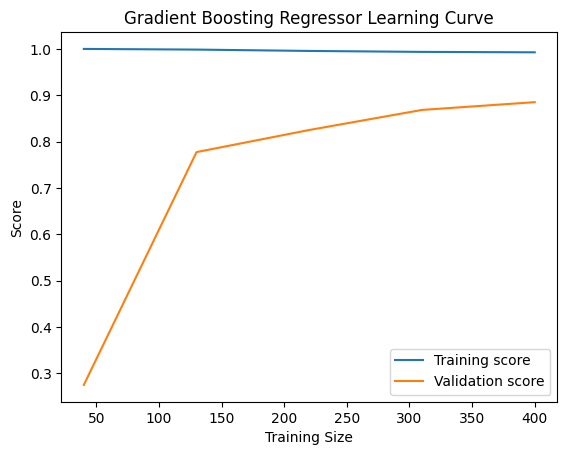

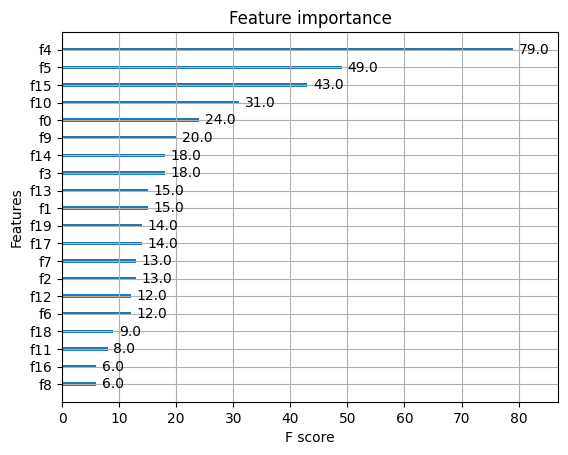

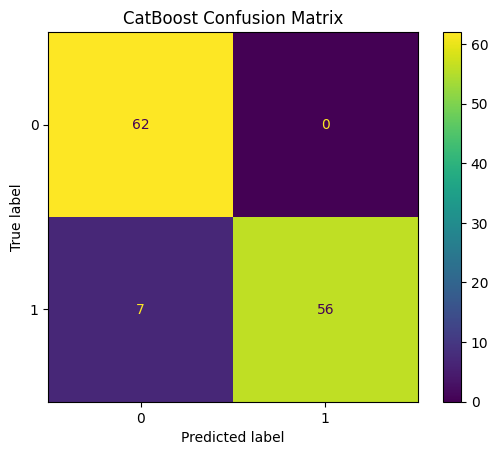

Estimators: 10, Accuracy: 0.904
Estimators: 50, Accuracy: 0.928
Estimators: 100, Accuracy: 0.928
Estimators: 200, Accuracy: 0.912


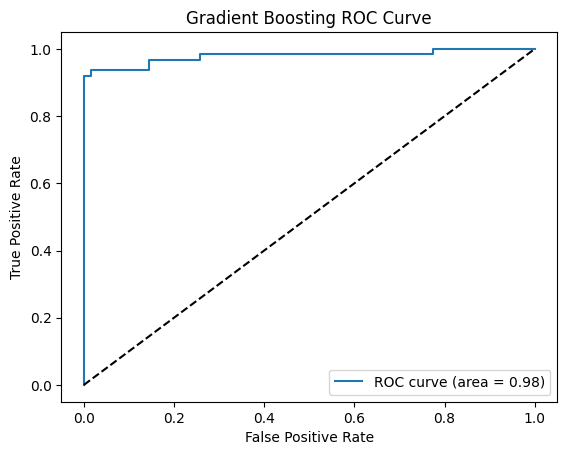

Best learning rate: {'learning_rate': 0.1}
F1 Balanced: 0.7368421052631579
F1 Weighted: 0.7083333333333334
Learning rate: 0.01, Accuracy: 0.896
Learning rate: 0.1, Accuracy: 0.896
Learning rate: 0.5, Accuracy: 0.904
Learning rate: 1, Accuracy: 0.928
Log-loss: 0.5640385859341673


In [39]:
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error, f1_score, roc_curve, auc, log_loss, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import numpy as np

# 1 AdaBoost Classifier
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
adb_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adb_clf.fit(X_train, y_train)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, adb_clf.predict(X_test)))

# 2 AdaBoost Regressor
Xr, yr = make_regression(n_samples=500, n_features=20, noise=0.1, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, random_state=42)
adb_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
adb_reg.fit(Xr_train, yr_train)
yr_pred = adb_reg.predict(Xr_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(yr_test, yr_pred))

# 3 Gradient Boosting Classifier Breast Cancer Feature Importance
bc = load_breast_cancer()
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(bc.data, bc.target, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_bc_train, y_bc_train)
print("Gradient Boosting Feature Importances:", gbc.feature_importances_)

# 4 Gradient Boosting Regressor R2 Score
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(Xr_train, yr_train)
yr_pred_gbr = gbr.predict(Xr_test)
print("Gradient Boosting Regressor R2:", r2_score(yr_test, yr_pred_gbr))

# 5 XGBoost Classifier vs Gradient Boosting Accuracy
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
gbc.fit(X_train, y_train)
acc_xgb = accuracy_score(y_test, xgb_clf.predict(X_test))
acc_gbc = accuracy_score(y_test, gbc.predict(X_test))
print("XGBoost Accuracy:", acc_xgb)
print("Gradient Boosting Accuracy:", acc_gbc)

# 6 CatBoost Classifier F1-Score
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)
print("CatBoost F1-Score:", f1_score(y_test, y_pred_cat))

# 7 XGBoost Regressor MSE
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(Xr_train, yr_train)
yr_pred_xgb = xgb_reg.predict(Xr_test)
print("XGBoost Regressor MSE:", mean_squared_error(yr_test, yr_pred_xgb))

# 8 AdaBoost Classifier Feature Importance Visualization
adb_clf.fit(X_train, y_train)
feat_imp = adb_clf.feature_importances_
plt.bar(range(len(feat_imp)), feat_imp)
plt.title("AdaBoost Feature Importances")
plt.show()

# 9 Gradient Boosting Regressor Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingRegressor(random_state=42), Xr, yr, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.title("Gradient Boosting Regressor Learning Curve")
plt.show()

# 10 XGBoost Classifier Feature Importance Visualization
xgb.plot_importance(xgb_clf)
plt.show()

# 11 CatBoost Classifier Confusion Matrix
cat_clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(cat_clf, X_test, y_test)
plt.title("CatBoost Confusion Matrix")
plt.show()

# 12 AdaBoost Classifier with Different Estimators
estimators = [10, 50, 100, 200]
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"Estimators: {n}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")

# 13 Gradient Boosting Classifier ROC Curve
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_score = gbc.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 14 XGBoost Regressor GridSearchCV Learning Rate Tuning
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=3)
grid_xgb.fit(Xr_train, yr_train)
print("Best learning rate:", grid_xgb.best_params_)

# 15 CatBoost on Imbalanced Dataset with and without Class Weights
X_imb, y_imb = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, random_state=42)
cat_balanced = CatBoostClassifier(verbose=0, random_state=42)
cat_balanced.fit(X_train_imb, y_train_imb)
cat_weighted = CatBoostClassifier(class_weights=[1, 9], verbose=0, random_state=42)
cat_weighted.fit(X_train_imb, y_train_imb)
print("F1 Balanced:", f1_score(y_test_imb, cat_balanced.predict(X_test_imb)))
print("F1 Weighted:", f1_score(y_test_imb, cat_weighted.predict(X_test_imb)))

# 16 AdaBoost Classifier with Different Learning Rates
for lr in [0.01, 0.1, 0.5, 1]:
    adb = AdaBoostClassifier(learning_rate=lr, random_state=42)
    adb.fit(X_train, y_train)
    print(f"Learning rate: {lr}, Accuracy: {accuracy_score(y_test, adb.predict(X_test))}")

# 17 XGBoost Multi-class Classification with Log-loss Evaluation
X_multi, y_multi = make_classification(n_samples=500, n_classes=3, n_features=20, n_informative=3, random_state=42)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_multi, y_multi, random_state=42)
xgb_multi = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_multi.fit(Xm_train, ym_train)
y_prob = xgb_multi.predict_proba(Xm_test)
print("Log-loss:", log_loss(ym_test, y_prob))